In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
O2_SSP126_data = google_cloud_cmip6.query( 
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

O2_SSP245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

O2_SSP585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

#code above selects for Oxygen concentration of different ssp scenarios using the same activity id, source id, grid label, member id, etc. 

In [5]:
o2sat_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

o2sat_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

#code above selects for Oxygen saturation of different ssp scenarios using the same activity id, source id, grid label, member id, etc. 

In [6]:
gcs = gcsfs.GCSFileSystem(token='anon')
#datasets for O2
zstore_O2_SSP126_data = O2_SSP126_data.zstore.values[-1]
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_O2_SSP585_data = O2_SSP585_data.zstore.values[-1] 

In [7]:
# creates a mutable-mapping-style interface to the store
mapper_O2_SSP126 = gcs.get_mapper(zstore_O2_SSP126_data)

# opens the dataset using xarray and zarr
O2_SSP126 = xr.open_zarr(mapper_O2_SSP126, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_O2_SSP585 = gcs.get_mapper(zstore_O2_SSP585_data)
O2_SSP585 = xr.open_zarr(mapper_O2_SSP585, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})


In [8]:
#datasets for O2sat
zstore_o2sat_ssp126 = o2sat_ssp126_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]
zstore_o2sat_ssp585 = o2sat_ssp585_data.zstore.values[-1]

In [9]:
# creates a mutable-mapping-style interface to the store
mapper_o2sat_ssp126 = gcs.get_mapper(zstore_o2sat_ssp126)

# opens the dataset using xarray and zarr
O2_sat_SSP126 = xr.open_zarr(mapper_o2sat_ssp126, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp245 = gcs.get_mapper(zstore_o2sat_ssp245)
O2_sat_SSP245 = xr.open_zarr(mapper_o2sat_ssp245, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp585 = gcs.get_mapper(zstore_o2sat_ssp585)
O2_sat_SSP585 = xr.open_zarr(mapper_o2sat_ssp585, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [10]:
#difference plots for 02
diff_O2_SSP126=(O2_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time')) 

diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP585=(O2_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

#difference plots for 02sat
diff_O2sat_SSP126=(O2_sat_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP585=(O2_sat_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

In [11]:
#creastes variables for Apparent Oxygen Utilization
AOU_SSP126=O2_SSP126-O2_sat_SSP126
AOU_SSP245=O2_SSP245-O2_sat_SSP245
AOU_SSP585=O2_SSP585-O2_sat_SSP585

In [12]:
AOU_d126=(AOU_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
AOU_d245=(AOU_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
AOU_d585=(AOU_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

In [14]:
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins #imported basin mask for esm4 grid

Text(0.5, 1.0, 'Ocean Basin Mask')

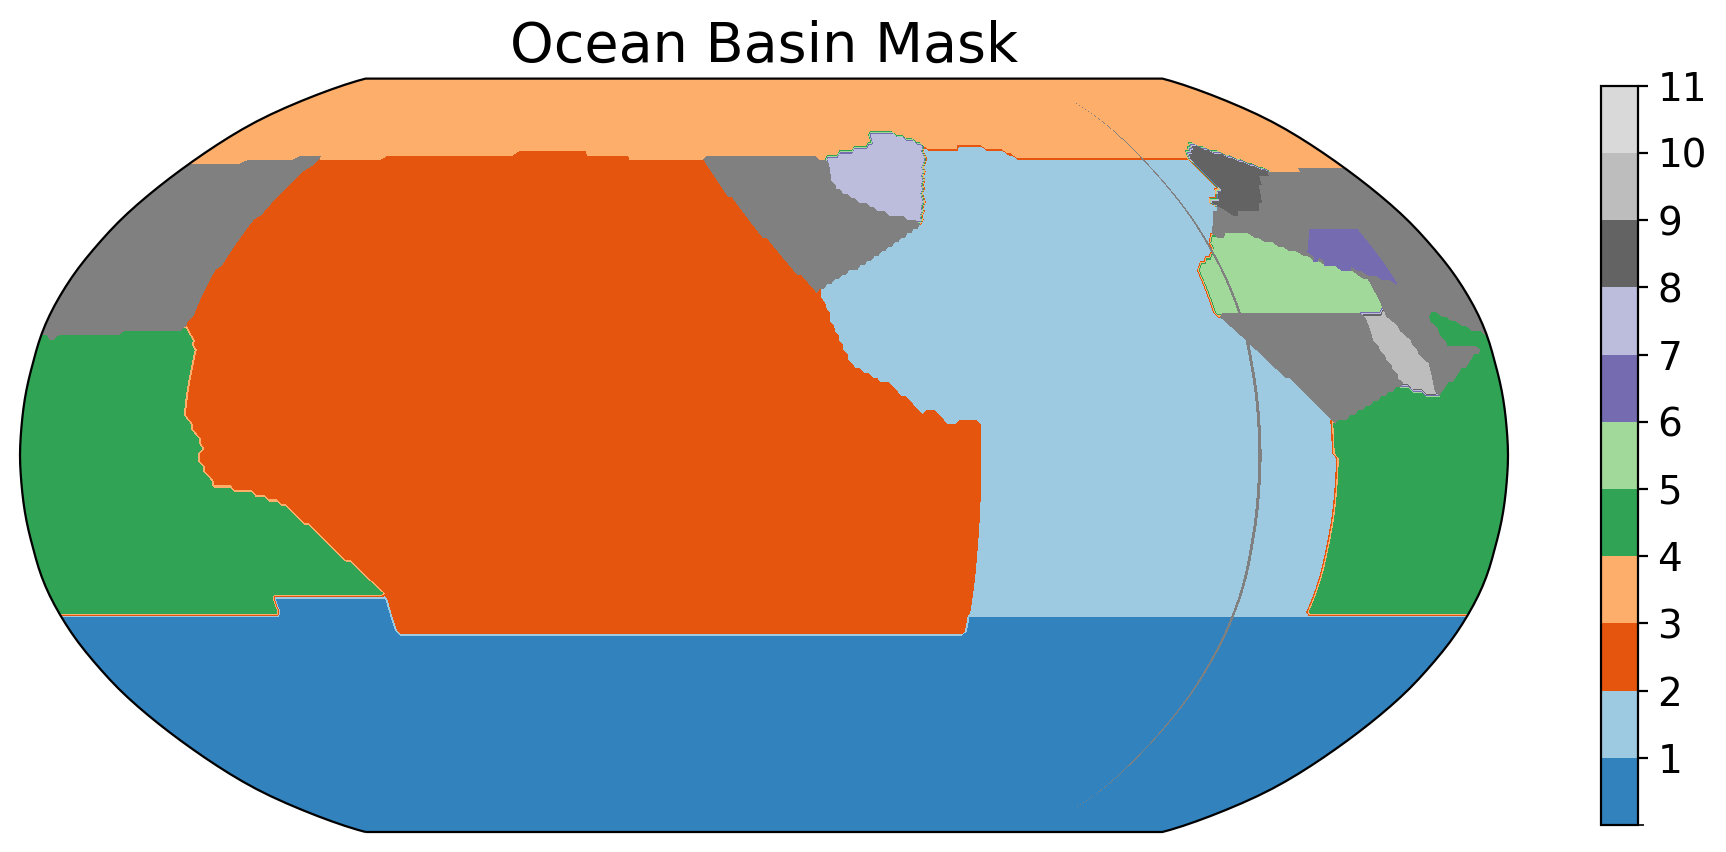

In [15]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p =esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [16]:
southernocean = (esm4_basins.where(esm4_basins==1) /  esm4_basins.where(esm4_basins==1)) #Values 1 over southern ocean, NaN elsewhere
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2)) #Values 1 over atlantic, NaN elsewhere
pacificocean =  (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3)) #Values 1 over pacific, NaN elsewhere
articocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4)) #Values 1 over arctic, NaN elsewhere
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5)) #Values 1 over indian, NaN elsewhere

In [17]:
sat_top = O2_sat_SSP585.sel(lev=slice(0,1000)).sel(time=slice('2080-01-16','2100-12-16')).mean(dim='time').mean(dim='lev')

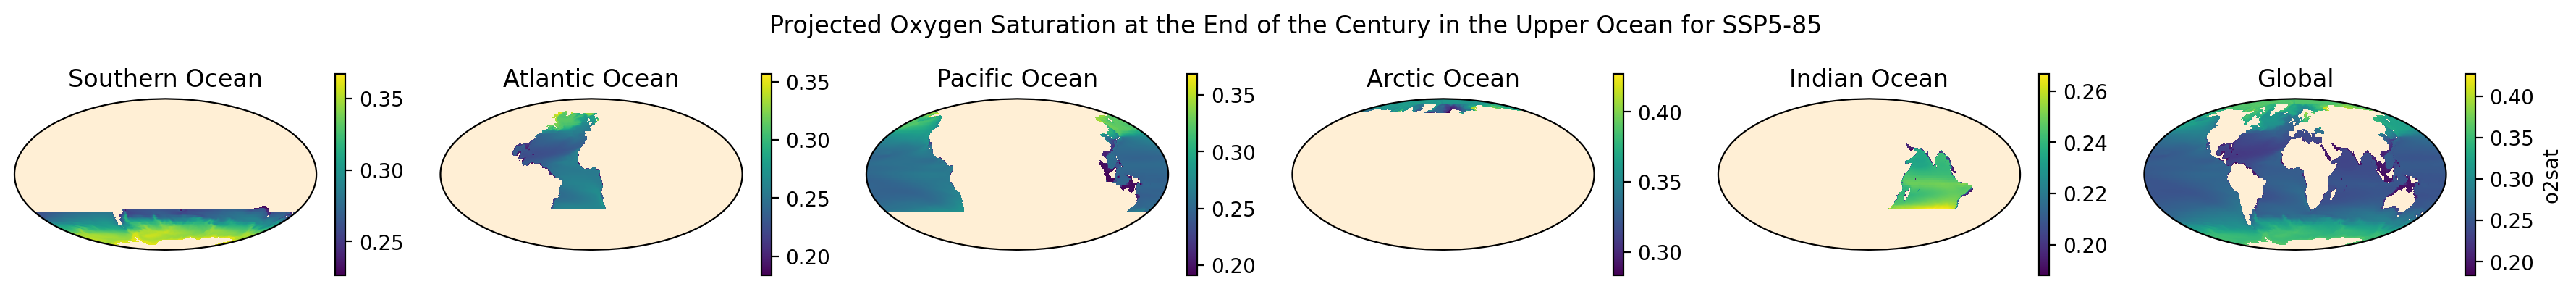

In [36]:
subplot_kws=dict(projection=ccrs.Mollweide(), #creates a plot with the Mollweide Cartopy map projection
                 facecolor='papayawhip') #sets the facecolor of the contenents a beige color

fig, (ax)=plt.subplots(ncols=6,nrows=1, figsize=(18,2),subplot_kw=subplot_kws) #creates a 2x3 grid plots 
(sat_top*southernocean).plot(ax=ax[0],
                              transform=ccrs.PlateCarree())
(sat_top*atlanticocean).plot(ax=ax[1],
                                transform=ccrs.PlateCarree())
(sat_top*pacificocean).plot(ax=ax[2],
                              transform=ccrs.PlateCarree())
(sat_top*articocean).plot(ax=ax[3],
                              transform=ccrs.PlateCarree())
(sat_top*indianocean).plot(ax=ax[4],
                              transform=ccrs.PlateCarree())
sat_top.plot(ax=ax[5], transform=ccrs.PlateCarree())

ax[0].set_title('Southern Ocean')
ax[1].set_title('Atlantic Ocean')
ax[2].set_title('Pacific Ocean')
ax[3].set_title('Arctic Ocean')
ax[4].set_title('Indian Ocean')
ax[5].set_title('Global')

fig.suptitle('Projected Oxygen Saturation at the End of the Century in the Upper Ocean​ for SSP5-85')
plt.tight_layout()

**Figure 5.** (a-f) Last Twenty Years of Surface Oxygen Saturation(%) of Different Ocean Basins for SSP5-85. a) Southern Ocean, b) Atlantic Ocean, c) Pacific Ocean, d) Arctic Ocean, e) Indian Ocean, f) Global Ocean. Last twenty years of the simulation (2081-2100) were sliced from the dataset and averaged. Similar to time, depth was sliced (0 meters - 1000 meters) then averaged; however, area weights was not applied to calculations. Different ocean basins created by applying ESM4’s basin mask to the SSP5-85 data from Google Cloud CMIP6, institution NOAA-GFDL, and model ESM4 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

In [18]:
world_O2_SSP585=O2_SSP585.mean(dim='lev').mean(dim='time')

pacific_test = ((O2_SSP585*pacificocean).sel(time=slice('2080-01-16','2100-12-16')).mean(dim='time').mean(dim='lev'))- (
    (O2_SSP585*pacificocean).sel(time=slice('2015-01-16','2034-12-16')).mean(dim='time').mean(dim='lev'))

pacific_test

<xarray.DataArray (latitude: 180, longitude: 360)>
dask.array<sub, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

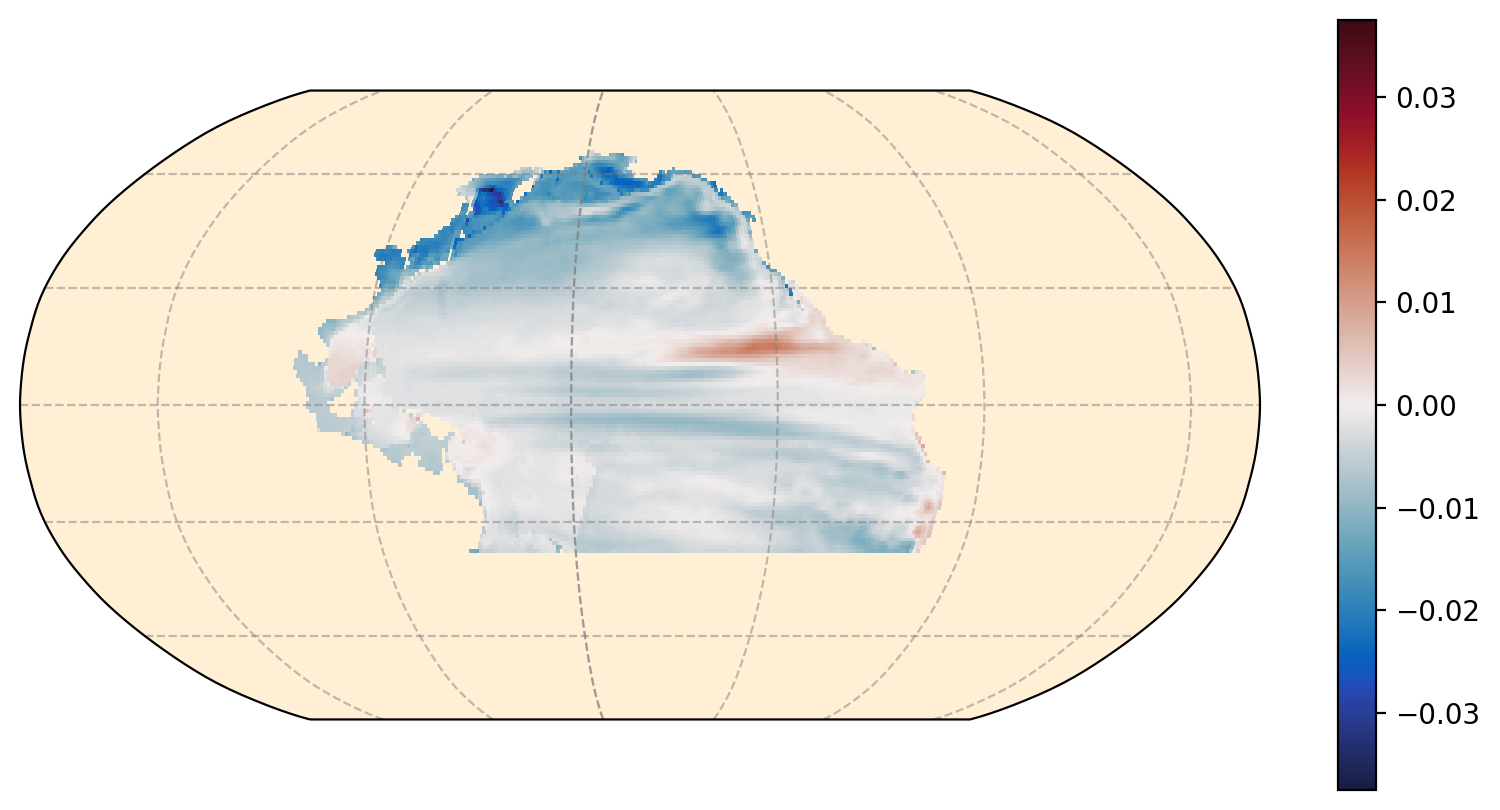

In [20]:
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=200,globe=None),facecolor='papayawhip')

fig, ax=plt.subplots(figsize=(10,5),subplot_kw=subplot_kws)

pacific_test.plot(transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance)

ax.gridlines(color='grey', alpha=0.5, linestyle='--')

In [19]:
O2_southern1 = (O2_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')
O2_southern2 = (O2_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev') 
s02_diff = O2_southern2-O2_southern1

at02_diff = ((O2_SSP585*atlanticocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((O2_SSP585*atlanticocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

p02_diff = ((O2_SSP585*pacificocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((O2_SSP585*pacificocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

ar02_diff = ((O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))-((O2_SSP585*articocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

i02_diff = ((O2_SSP585*indianocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')) - ((O2_SSP585*indianocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))
#plot the first 20 years 2015-2035 and last 20 (2080-2100)  
#difference plots for O2 concentrations 
#takes a mean of latitude, longitude, and level
#groups by the months to get a monthy average 


In [20]:
#O2_585_atlantic = (O2_SSP585*atlanticocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    #'time.month').mean(dim='time').mean(dim='lev')

#O2_585_pacific = (O2_SSP585*pacificocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
   # 'time.month').mean(dim='time').mean(dim='lev')

#O2_585_arctic = (O2_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
    #'time.month').mean(dim='time').mean(dim='lev')

#O2_585_indian = (O2_SSP585*indianocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2100-12-16')).groupby(
   # 'time.month').mean(dim='time').mean(dim='lev')



([<matplotlib.axis.XTick at 0x7f74e45b0610>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

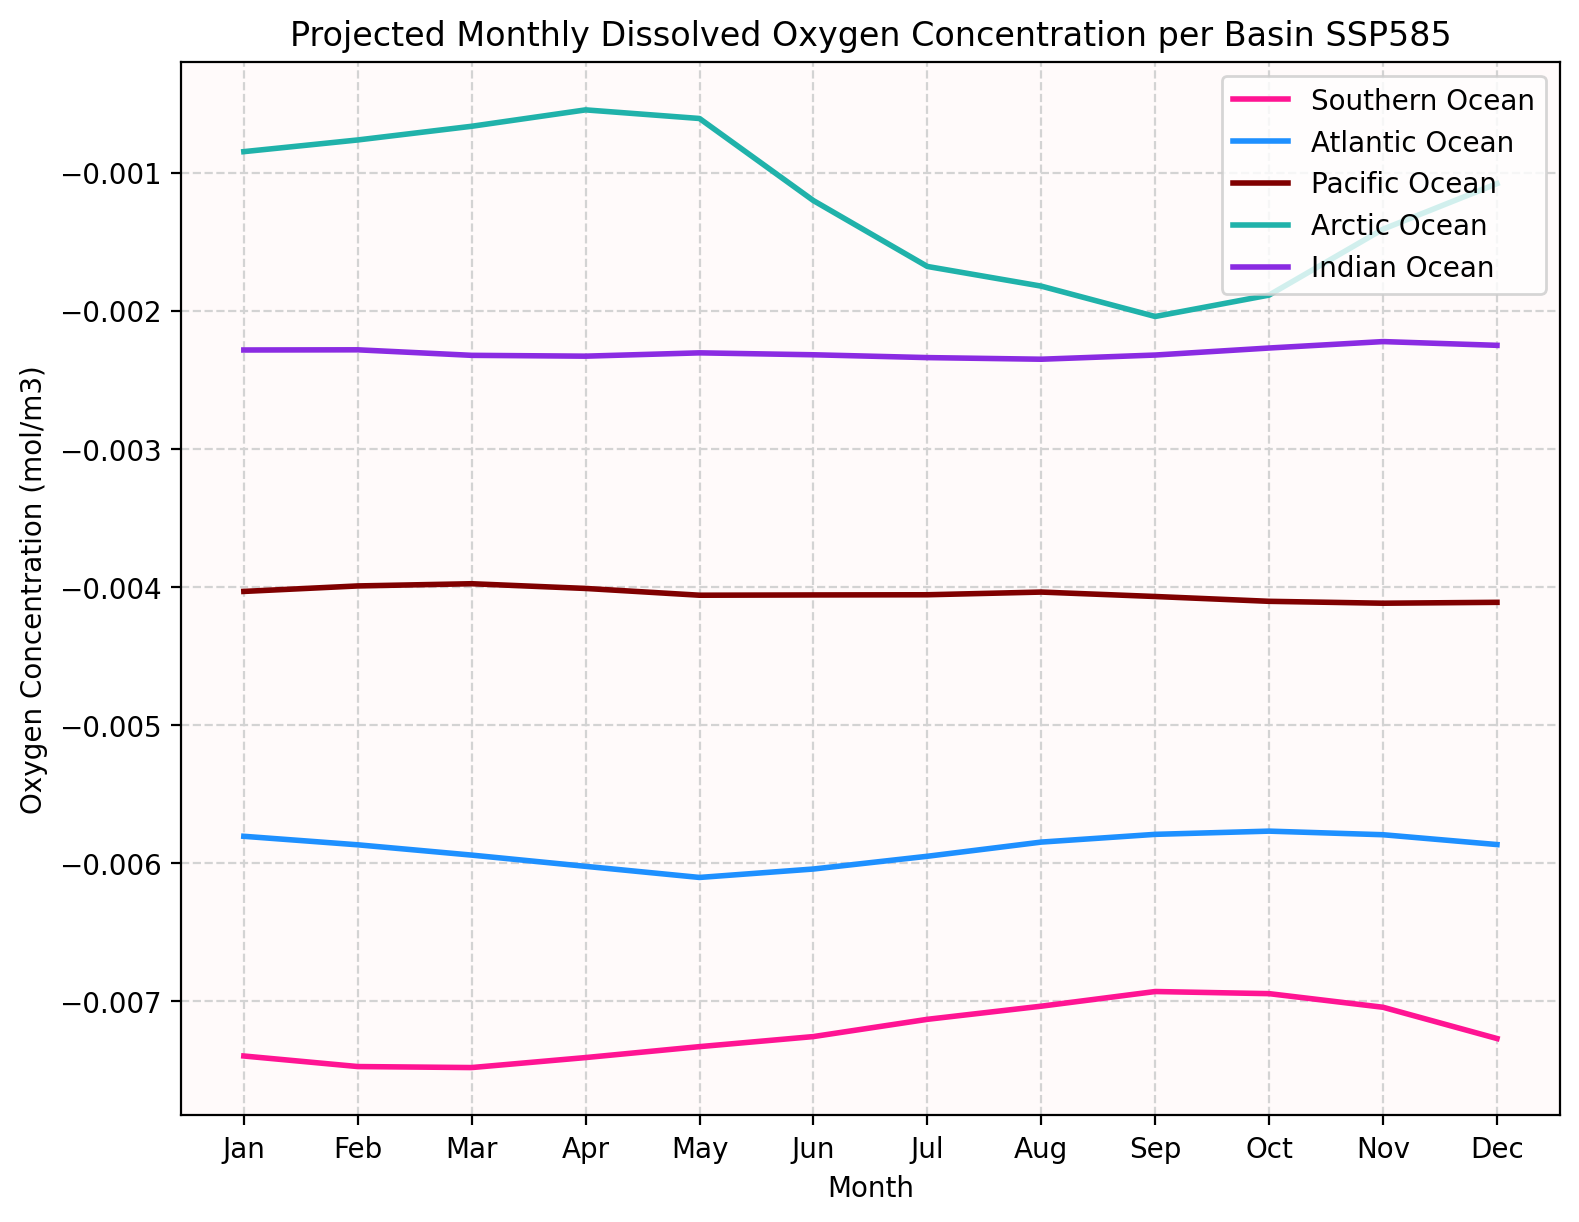

In [43]:
fig, (ax) = plt.subplots(figsize = (8, 6))

ax.plot(s02_diff, label = 'Southern Ocean', color='deeppink', linewidth = 2)
ax.plot(at02_diff, label = 'Atlantic Ocean',color='dodgerblue', linewidth = 2)
ax.plot(p02_diff, label = 'Pacific Ocean',color='maroon', linewidth = 2)
ax.plot(ar02_diff, label ='Arctic Ocean', color='lightseagreen', linewidth = 2)
ax.plot(i02_diff, label = 'Indian Ocean',color='blueviolet', linewidth = 2 )

#ax.legend()
#ax.set_legend()
plt.legend()
plt.ylabel('Oxygen Concentration (mol/m3)')
plt.xlabel('Month')
plt.grid(color='lightgrey', linestyle = '--')
plt.tight_layout()
plt.title('Projected Monthly Dissolved Oxygen Concentration per Basin SSP585')


ax.set_facecolor(color='snow')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

#code creates dissolved oxygen cocnentration per basin figure 

**Figure 6.** Monthly Difference of Dissolved Oxygen Concentration [mol/m^3] of the Ocean Basins of SSP5-85. Latitude, longitude, and level were averaged. Difference of time subtracts the last twenty years of the simulation (2081-2100) and the first twenty years (2015-2034), grouped by month and averaged resulting in a monthly average O2 content. Different ocean basins created by applying ESM4’s basin mask to the SSP5-85 data from Google Cloud CMIP6, institution NOAA-GFDL, and model ESM4 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

In [21]:
O2s_southern1 = (O2_sat_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')
O2s_southern2 = (O2_sat_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev') 
s02s_diff = O2s_southern2-O2s_southern1

at02s_diff = ((O2_sat_SSP585*atlanticocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((O2_sat_SSP585*atlanticocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

p02s_diff = ((O2_sat_SSP585*pacificocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((O2_sat_SSP585*pacificocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

ar02s_diff = ((O2_sat_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))-((O2_sat_SSP585*articocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

i02s_diff = ((O2_sat_SSP585*indianocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')) - ((O2_sat_SSP585*indianocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))
#plot the first 20 years 2015-2035 and last 20 (2080-2100)  


([<matplotlib.axis.XTick at 0x7f916e95d400>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

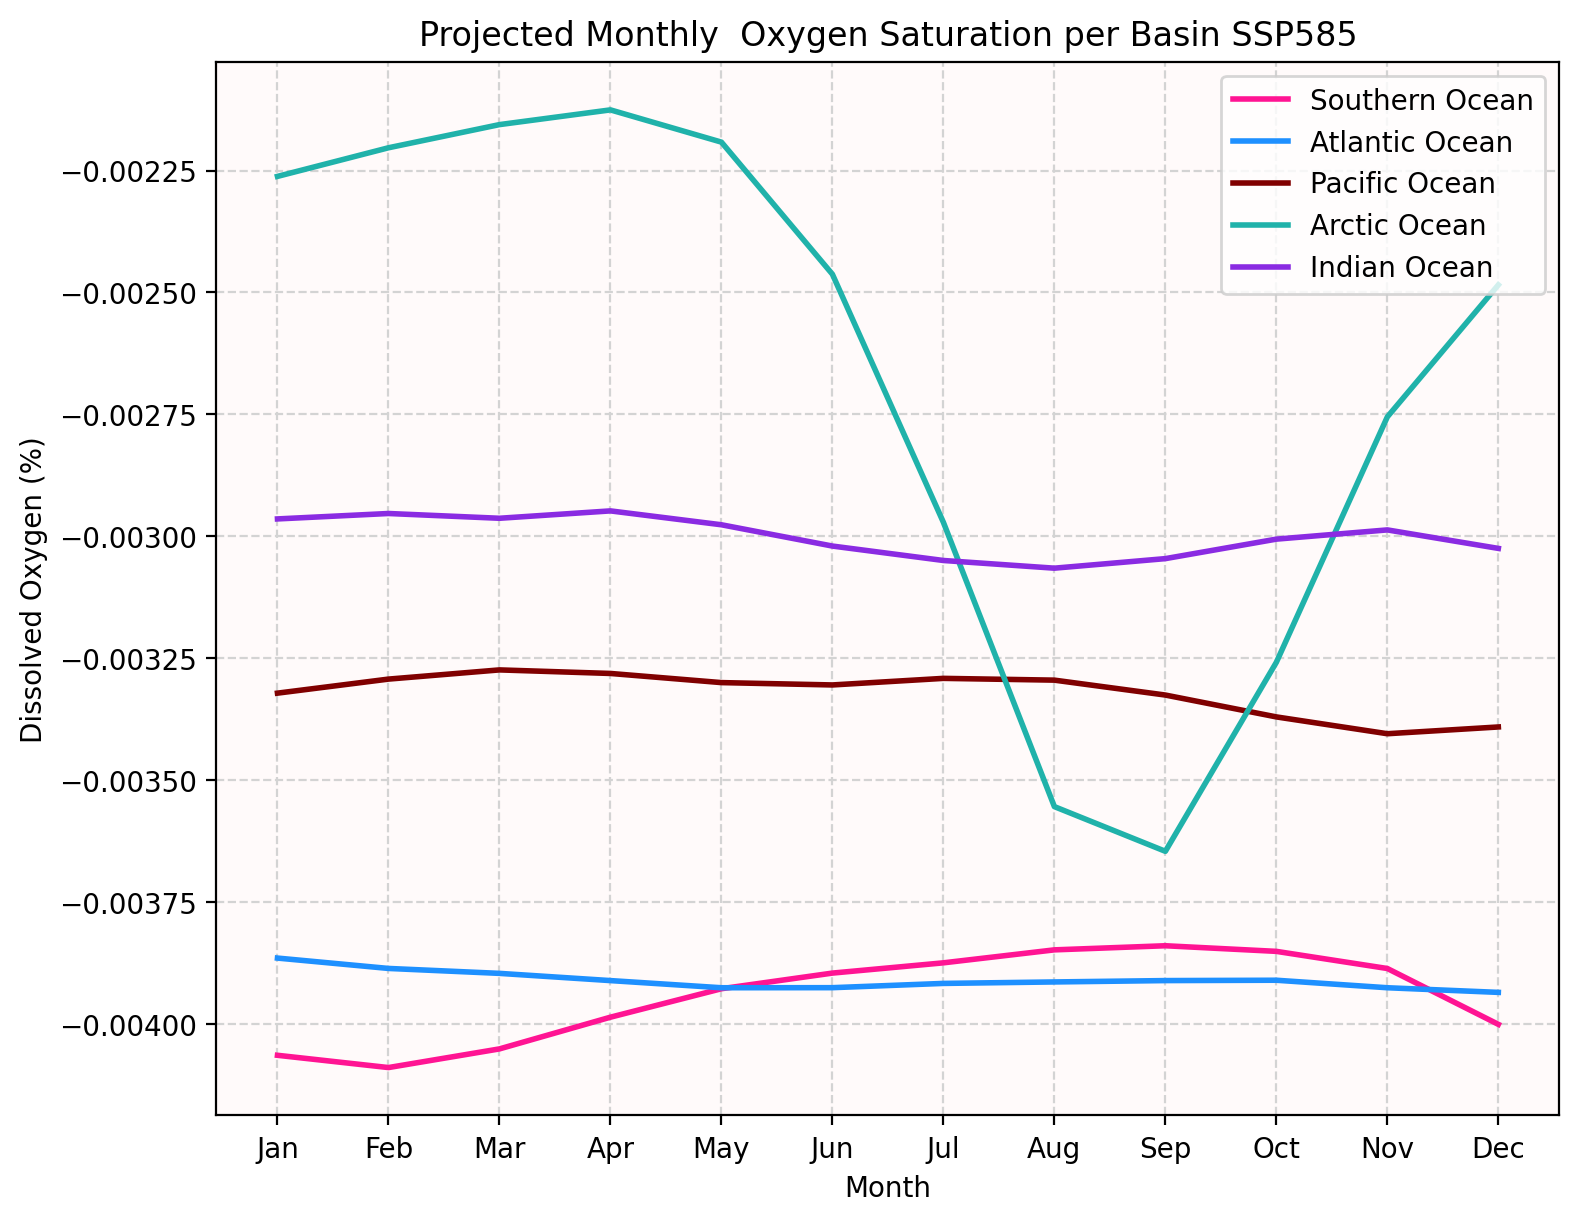

In [23]:
fig, (ax) = plt.subplots(figsize = (8, 6))

ax.plot(s02s_diff, label = 'Southern Ocean', color='deeppink', linewidth = 2 )
ax.plot(at02s_diff, label = 'Atlantic Ocean',color='dodgerblue', linewidth = 2)
ax.plot(p02s_diff, label = 'Pacific Ocean',color='maroon', linewidth = 2)
ax.plot(ar02s_diff, label ='Arctic Ocean', color='lightseagreen', linewidth = 2)
ax.plot(i02s_diff, label = 'Indian Ocean',color='blueviolet', linewidth = 2 )

#ax.legend()
#ax.set_legend()
plt.legend()
plt.ylabel('Dissolved Oxygen (%)')
plt.xlabel('Month')
plt.grid(color='lightgrey', linestyle = '--')
plt.tight_layout()
plt.title('Projected Monthly  Oxygen Saturation per Basin SSP585')


ax.set_facecolor(color='snow')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

**Figure 7.**  Projected Monthly Difference of Oxygen Saturation [%] of the Ocean Basins of SSP5-85. Latitude, longitude, and level were averaged. Difference of time subtracts the last twenty years of the simulation (2081-2100) and the first twenty years (2015-2034), grouped by month and averaged resulting in a monthly average O2 content. Different ocean basins created by applying ESM4’s basin mask to the SSP5-85 data from Google Cloud CMIP6, institution NOAA-GFDL, and model ESM4 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

In [24]:
AOU_SSP585

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [25]:
O2_AOUsouthern1 = (AOU_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')
O2s_AOUsouthern2 = (AOU_SSP585*southernocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev') 
sAOU_diff = O2s_AOUsouthern2-O2_AOUsouthern1

atAOU_diff = ((AOU_SSP585*atlanticocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((AOU_SSP585*atlanticocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

pAOU_diff = ((AOU_SSP585*pacificocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- ((AOU_SSP585*pacificocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

arAOU_diff = ((AOU_SSP585*articocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))-((AOU_SSP585*articocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

iAOU_diff = ((AOU_SSP585*indianocean).mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev')) - ((AOU_SSP585*indianocean).mean(
    dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))
#plot the first 20 years 2015-2035 and last 20 (2080-2100)  


([<matplotlib.axis.XTick at 0x7f74e3822820>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

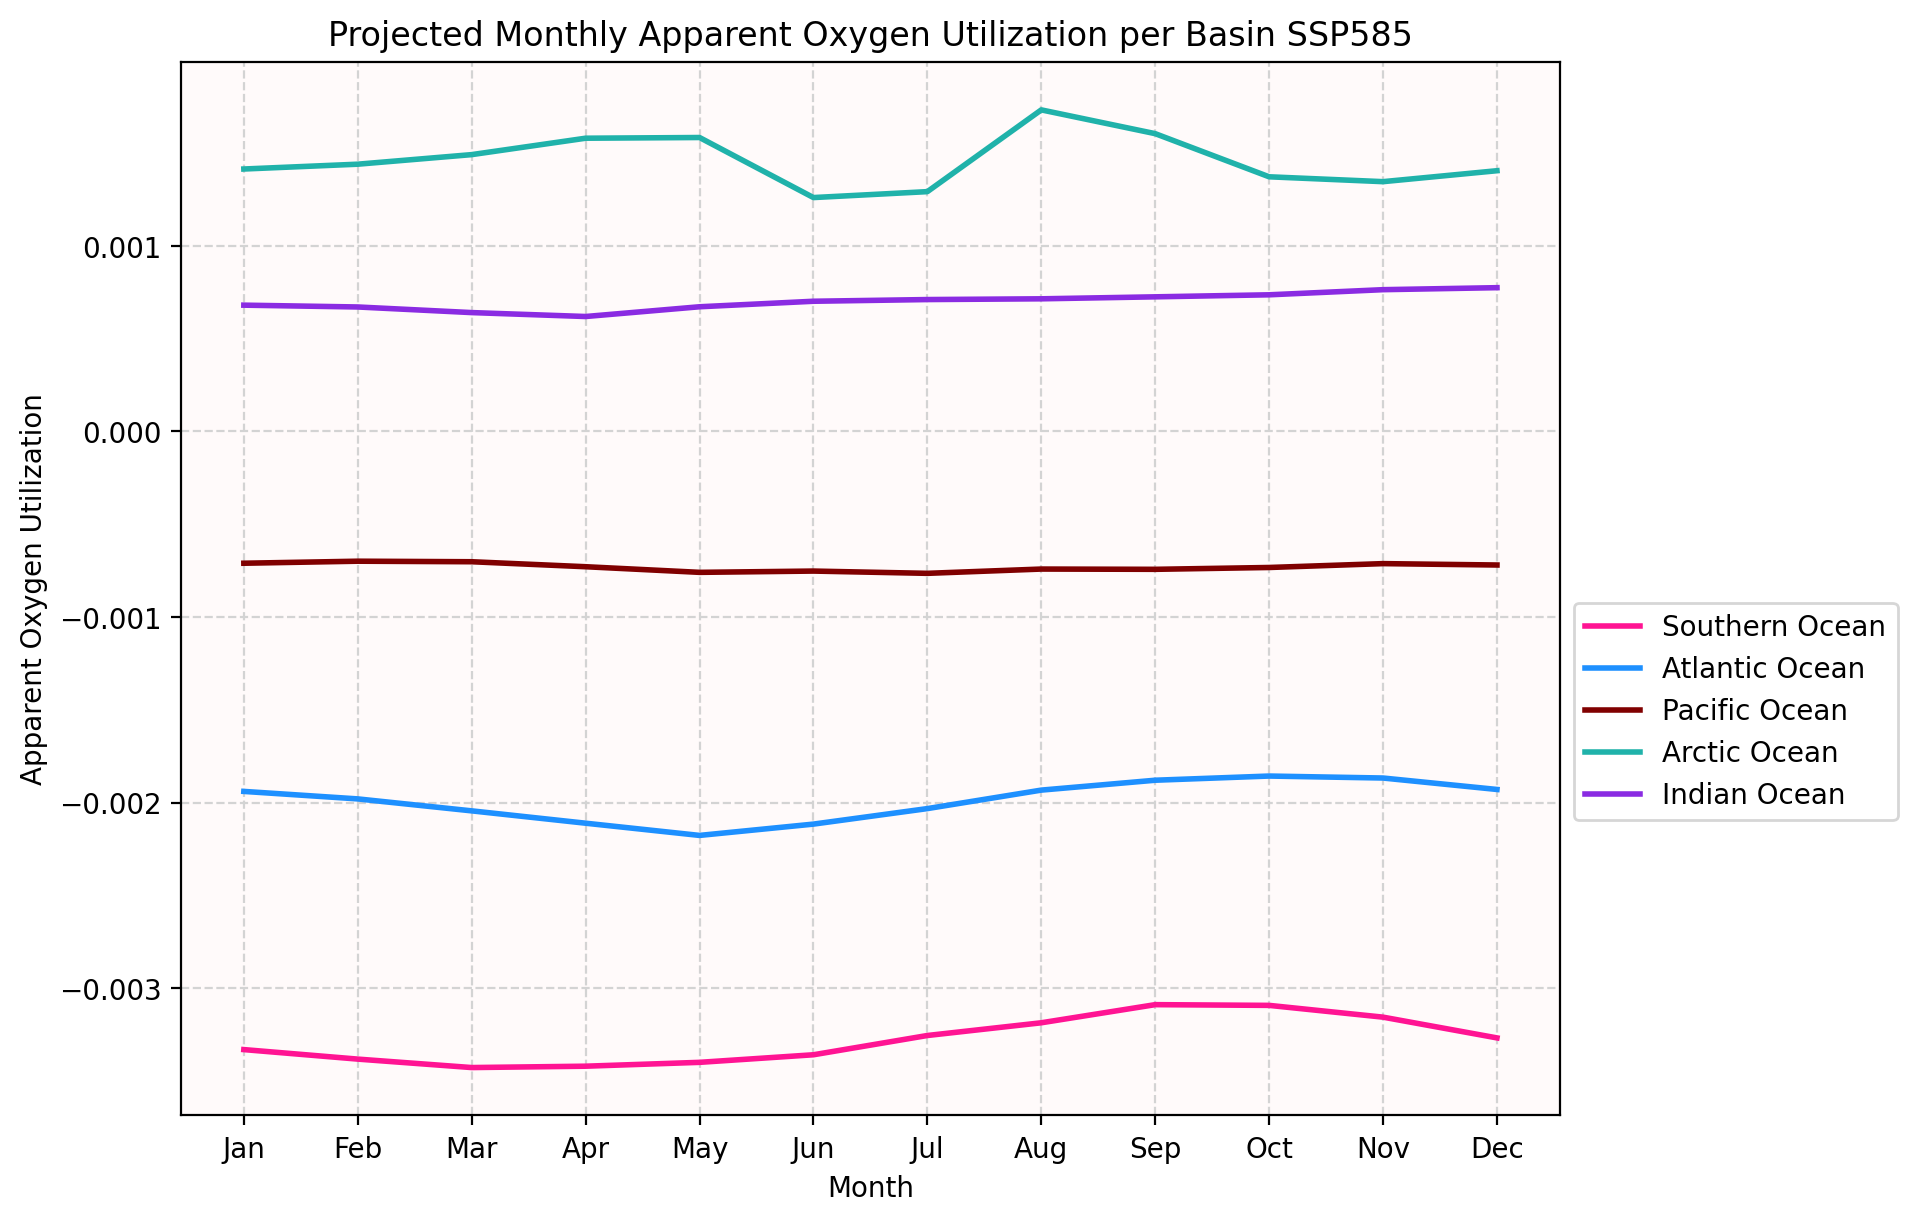

In [55]:
fig, (ax) = plt.subplots(figsize = (8, 6))

ax.plot(sAOU_diff, label = 'Southern Ocean', color='deeppink', linewidth = 2 )
ax.plot(atAOU_diff, label = 'Atlantic Ocean',color='dodgerblue', linewidth = 2)
ax.plot(pAOU_diff, label = 'Pacific Ocean',color='maroon', linewidth = 2)
ax.plot(arAOU_diff, label ='Arctic Ocean', color='lightseagreen', linewidth = 2)
ax.plot(iAOU_diff, label = 'Indian Ocean',color='blueviolet', linewidth = 2 )

#ax.legend()
#ax.set_legend()
#plt.legend()
plt.ylabel('Apparent Oxygen Utilization')
plt.xlabel('Month')
plt.grid(color='lightgrey', linestyle = '--')
plt.tight_layout()
plt.title('Projected Monthly Apparent Oxygen Utilization per Basin SSP585')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor(color='snow')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

**Figure 8.**  Projected Monthly Difference of Apparent Oxygen Utilization [mol/m^3] of the Ocean Basins of SSP5-85. Latitude, longitude, and level were averaged. Difference of time subtracts the last twenty years of the simulation (2081-2100) and the first twenty years (2015-2034), grouped by month and averaged resulting in a monthly average O2 content. Different ocean basins created by applying ESM4’s basin mask to the SSP5-85 data from Google Cloud CMIP6, institution NOAA-GFDL, and model ESM4 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

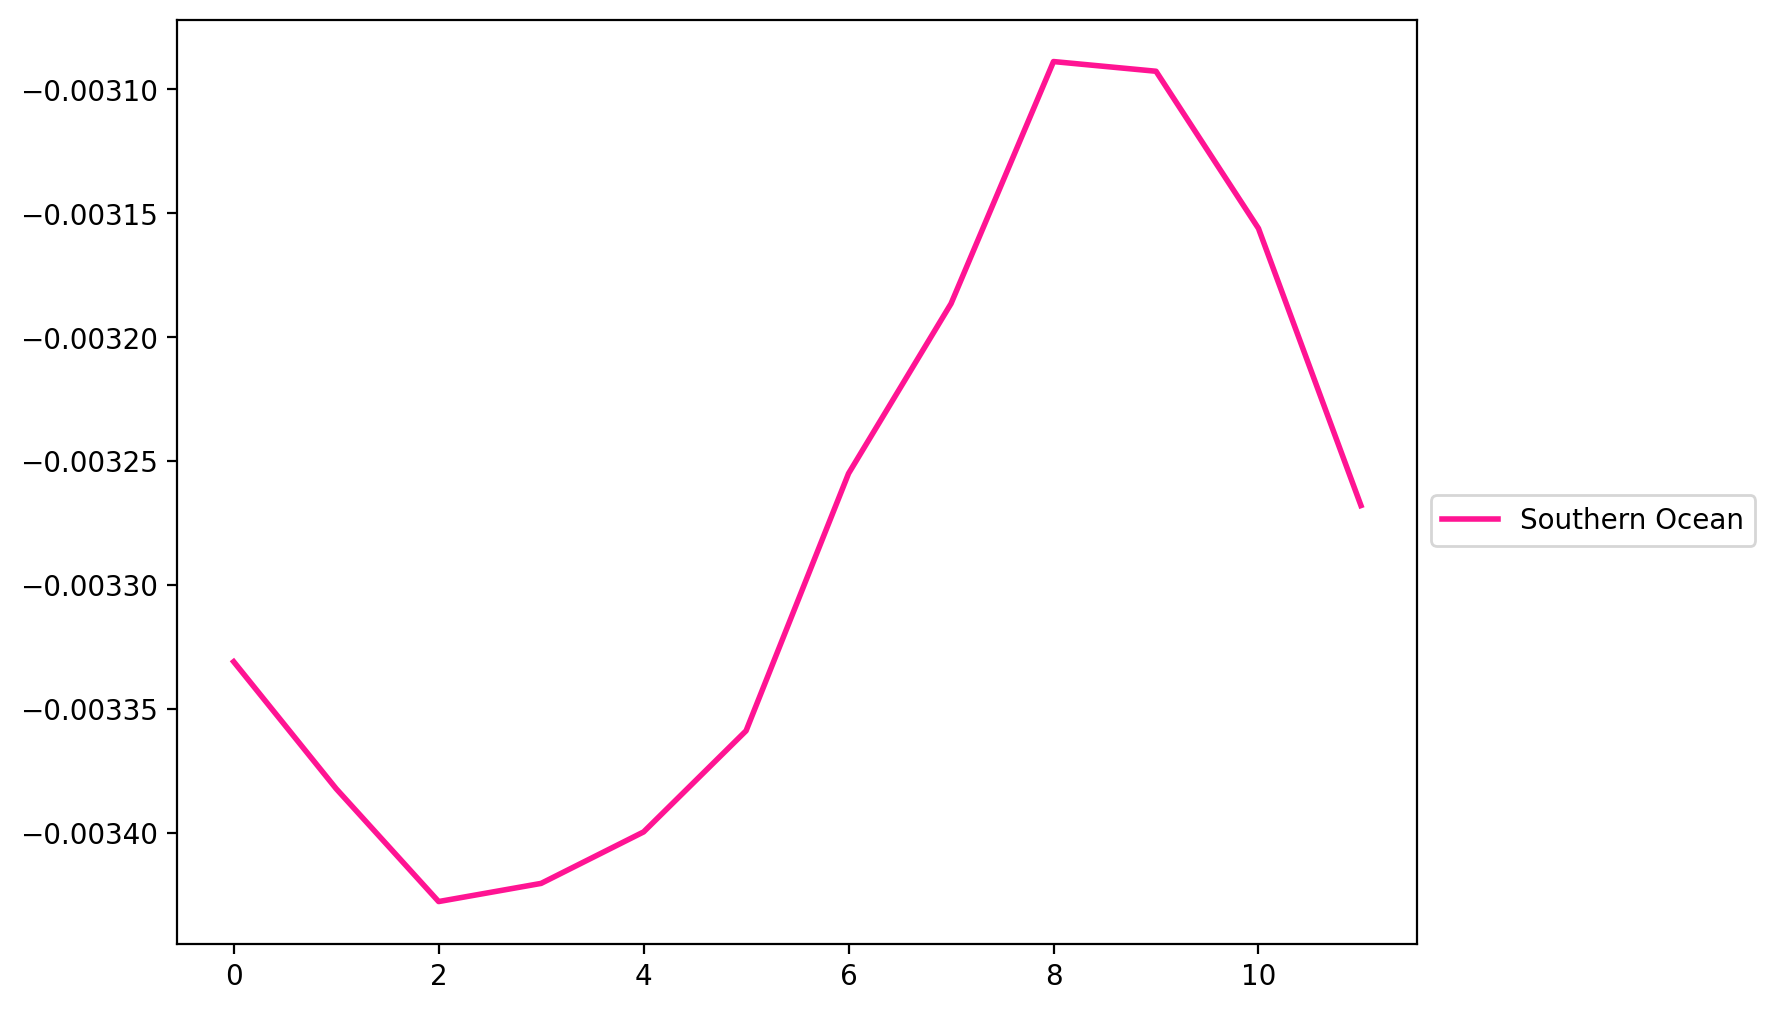

In [56]:
fig, (ax) = plt.subplots(figsize = (8, 6))

ax.plot(sAOU_diff, label = 'Southern Ocean', color='deeppink', linewidth = 2 )
plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))

In [22]:
O2_SSP585

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

NameError: name 'avgO2_15_100' is not defined

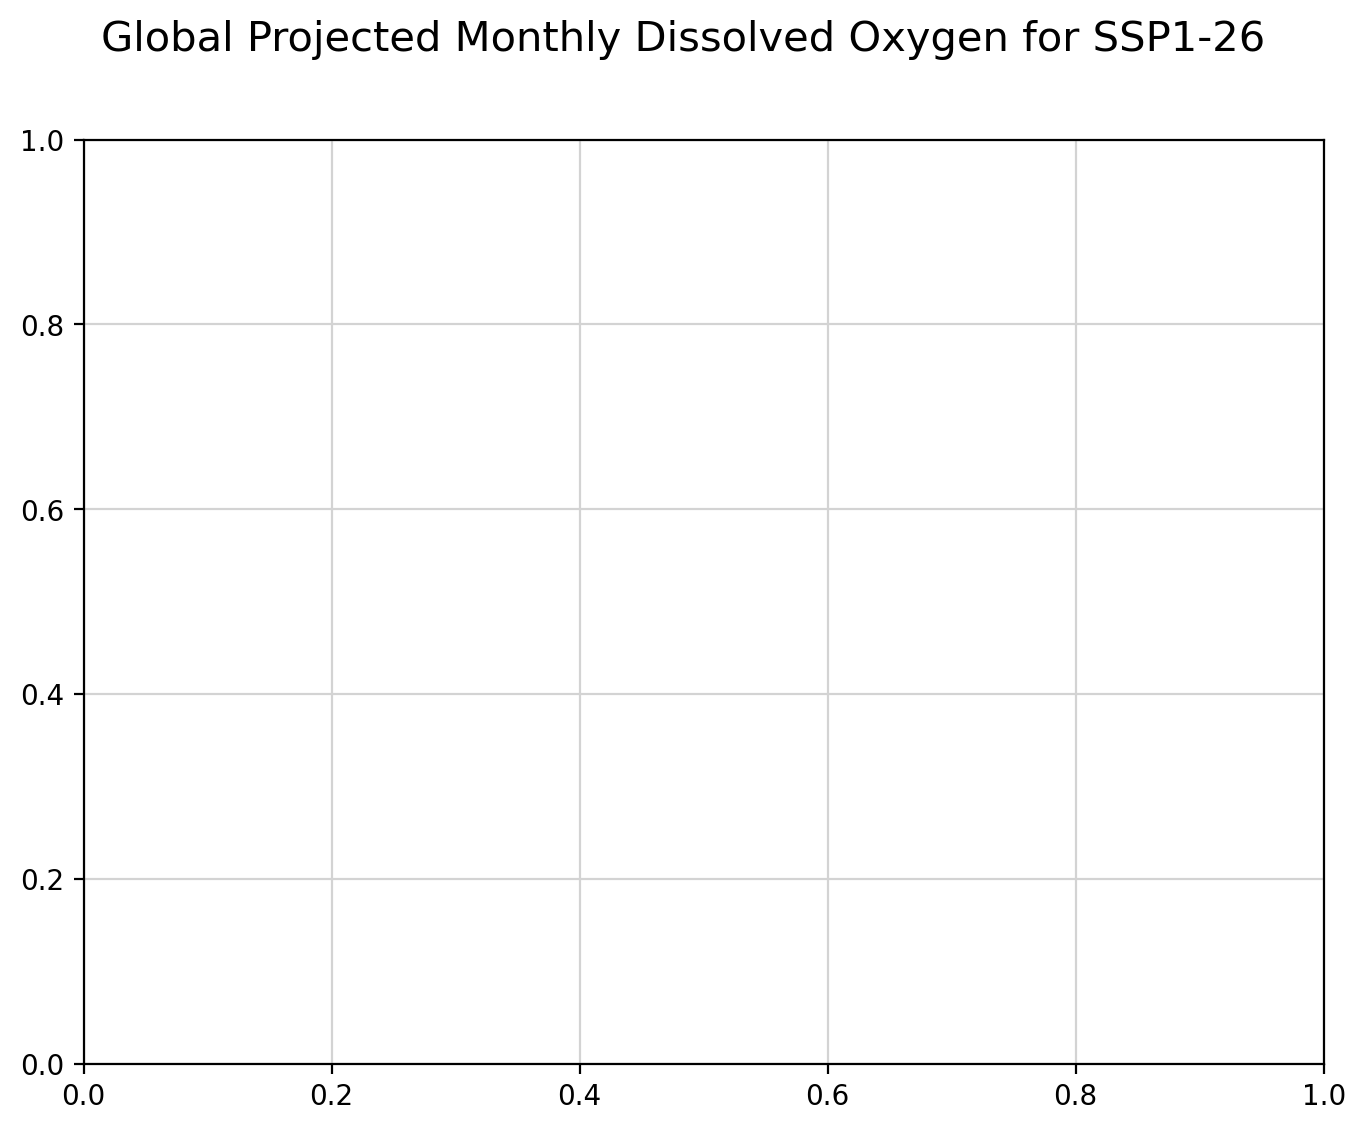

In [60]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Global Projected Monthly Dissolved Oxygen for SSP1-26', fontsize=15)

ax.grid(color='lightgrey')

ax.fill_between(avgO2_15_100['month'], avgO2_15_100+stdO2_15_100,avgO2_15_100-stdO2_15_100, 
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(avgO2_15_100['month'], avgO2_15_100+(2*stdO2_15_100),avgO2_15_100-(2*stdO2_15_100), 
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')
ax.plot(avgO2_15_100['month'], 
        avgO2_15_100, linewidth=2, linestyle='--',
        label='2015-2100 Average', color='blue')

ax.plot(avgO2_2015['month'], avgO2_2015, linewidth=2, label='2015', color='mediumvioletred')
ax.plot(avgO2_2050['month'], avgO2_2050, linewidth=2, label='2050', color='forestgreen')
ax.plot(avgO2_2100['month'], avgO2_2100, linewidth=2, label='2100', color='blueviolet')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.legend()
ax.set_ylabel('Dissolved Oxygen')
ax.set_xlabel('Month')

ax.set_facecolor('snow')

plt.tight_layout()

In [26]:
average_02 = O2_SSP585.mean(dim=['latitude','longitude','lev'])
global_2015 = average_02.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time')
global_2050=average_02.sel(time=slice('2050-01-16','2050-12-16')).groupby('time.month').mean(dim='time')
global_2100 = average_02.sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time')

#global_O2= (average_02.sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))-(average_02.
   # sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time'))

stdO2_2100=(average_02.sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').std(dim='time'))
stdO2_2015=(average_02.sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').std(dim='time'))


In [27]:
test_02 = average_02.groupby('time.month').mean(dim='time')

In [52]:
#global_O2 = (O2_SSP585.mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))- (O2_SSP585.mean(
    #dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').mean(dim='time').mean(dim='lev'))

#global_2015 = (O2_SSP585.mean(dim=['latitude','longitude','lev']).sel(time=slice('2015-01-16','2015-12-16')).groupby('time.month').mean(dim='time'))

#global_2100 = (O2_SSP585.mean(dim=['latitude','longitude','lev']).sel(time=slice('2100-01-16','2100-12-16')).groupby('time.month').mean(dim='time'))

#global_2050= O2_SSP585.mean(dim=['latitude','longitude','lev']).sel(time=slice('2050-01-16','2050-12-16')).groupby('time.month').mean(dim='time')

#stdO2_global = (O2_SSP585.mean(dim=['latitude','longitude']).sel(time=slice('2080-01-16','2100-12-16')).groupby('time.month').std(dim='time').mean(dim='lev'))- (O2_SSP585.mean(
   # dim=['latitude','longitude']).sel(time=slice('2015-01-16','2034-12-16')).groupby('time.month').std(dim='time').mean(dim='lev'))


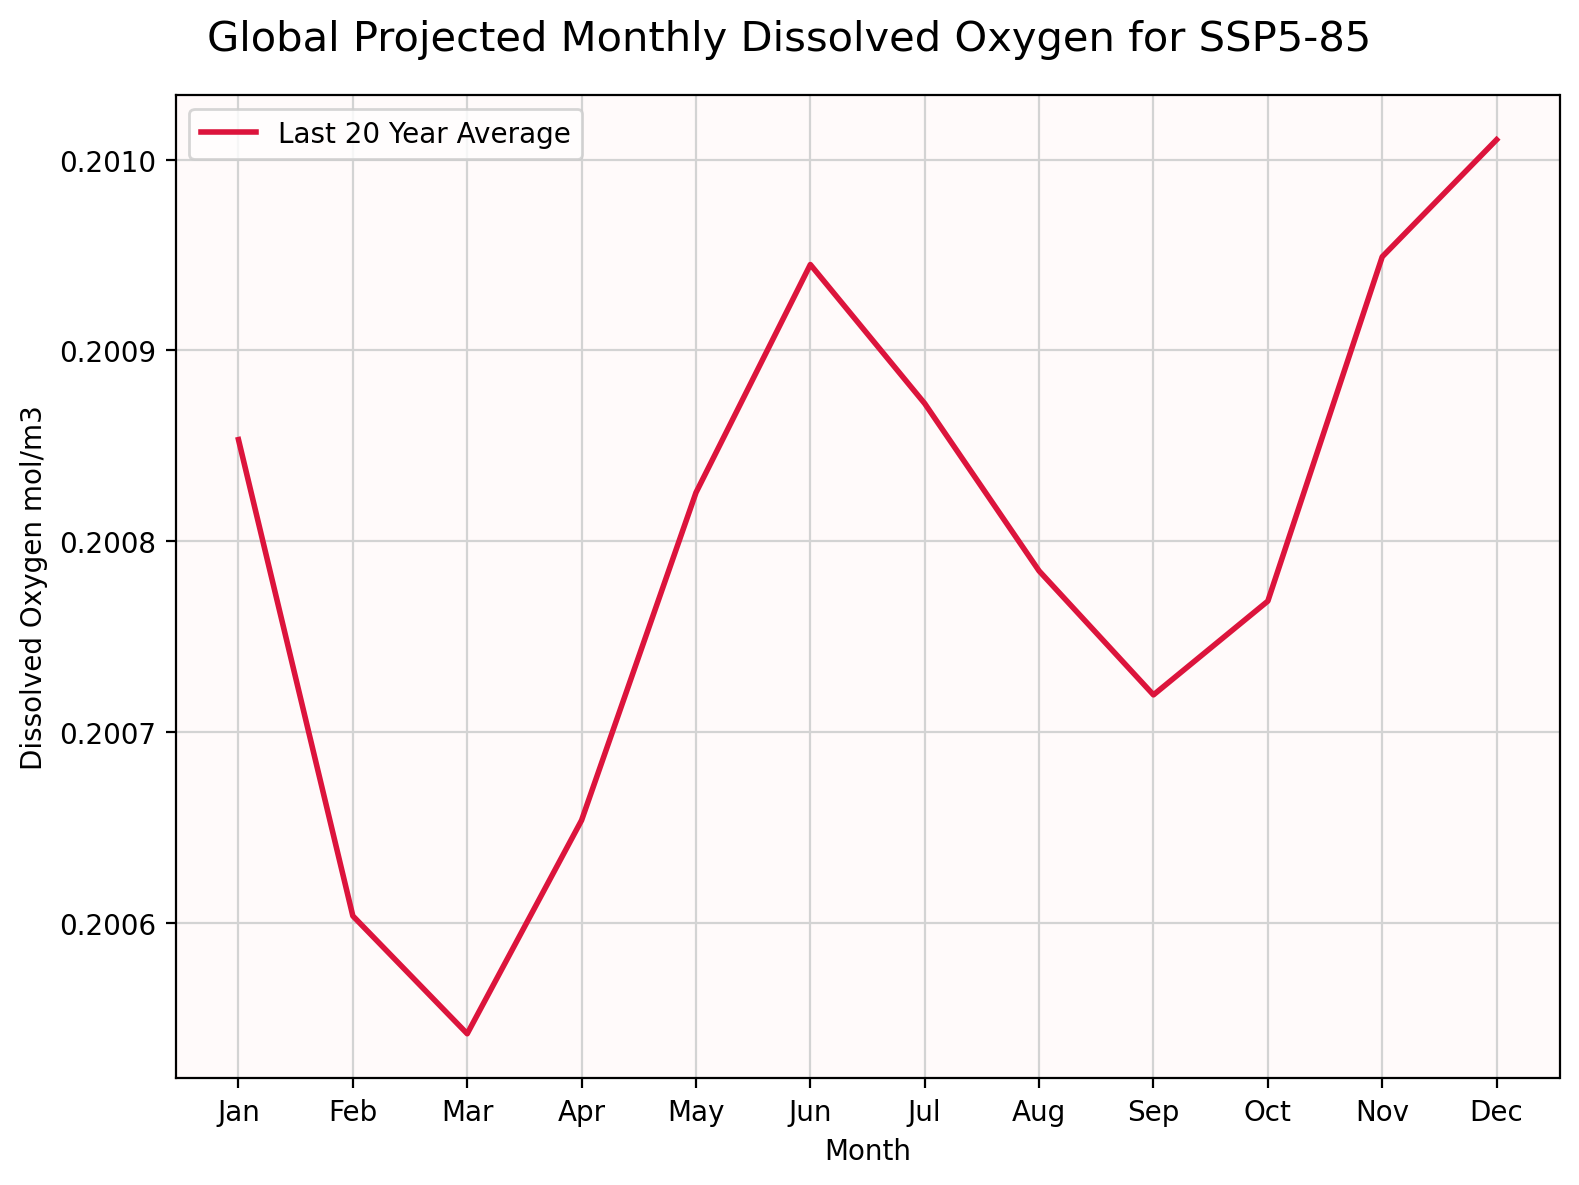

In [34]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

fig.suptitle('Global Projected Monthly Dissolved Oxygen for SSP5-85', fontsize=15)

#global_2015.plot(linewidth=2, 
                 #label='First 20 Year Average', 
                 #color='blue')


#ax.fill_between(global_2015['month'], global_2015+stdO2_2015, global_2015-stdO2_2015,
                #label='+/- 1 Standard Deviations',
                #alpha=0.5, color='cornflowerblue')


#ax.fill_between(global_2015['month'], global_2015+(2*stdO2_2015),global_2015-(2*stdO2_2015),
               # label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')


global_2100.plot(linewidth=2, 
                 label='Last 20 Year Average', 
                 color='crimson')


#ax.fill_between(global_2100['month'], global_2100+stdO2_2100, global_2100-stdO2_2100,
               #label='+/- 1 Standard Deviations',
                #alpha=0.5, color='pink')


#ax.fill_between(global_2100['month'], global_2100+(2*stdO2_2100),global_2100-(2*stdO2_2100),
                #label='+/- 2 Standard Deviations',alpha=0.3, color='lightpink')


ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


ax.legend()
ax.set_ylabel('Dissolved Oxygen mol/m3')
ax.set_xlabel('Month')
ax.set_facecolor('snow')
ax.grid(color='lightgrey')
plt.tight_layout()

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))
plt.title('Global Projected Monthly Dissolved Oxygen for SSP-585', fontsize=15)
global_O2.plot(linewidth=2, 
               linestyle='--',
               label='2015-2100 Average', 
               color='blue')


ax.fill_between(global_O2['month'], global_O2+stdO2_global,global_O2-stdO2_global,
                label='+/- 1 Standard Deviations',alpha=0.5, color='cornflowerblue')
ax.fill_between(global_O2['month'], global_O2+(2*stdO2_global),global_O2-(2*stdO2_global),
                label='+/- 2 Standard Deviations',alpha=0.3, color='cornflowerblue')

ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10, 11, 12],
              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend()

In [69]:
AOU_SSP585

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [25]:
start_AOU= AOU_SSP585.mean(['latitude','longitude'])

In [26]:
AOU_upper=start_AOU.sel(lev=slice(0,1000)) #emma's code
AOU_middle=start_AOU.sel(lev=slice(1000, 3000))
AOU_lower=start_AOU.sel(lev=slice(3000, 6500))

In [27]:
avg_upper=AOU_upper.mean(dim='lev') #emma's code
std_upper=AOU_upper.std(dim='lev')
avg_middle=AOU_middle.mean(dim='lev')
std_middle=AOU_middle.std(dim='lev')
avg_lower=AOU_lower.mean(dim='lev')
std_lower=AOU_lower.std(dim='lev')

upper_ml=ml.util.annual_average(avg_upper, tcoord='time')
middle_ml=ml.util.annual_average(avg_middle, tcoord='time')
lower_ml=ml.util.annual_average(avg_lower, tcoord='time')

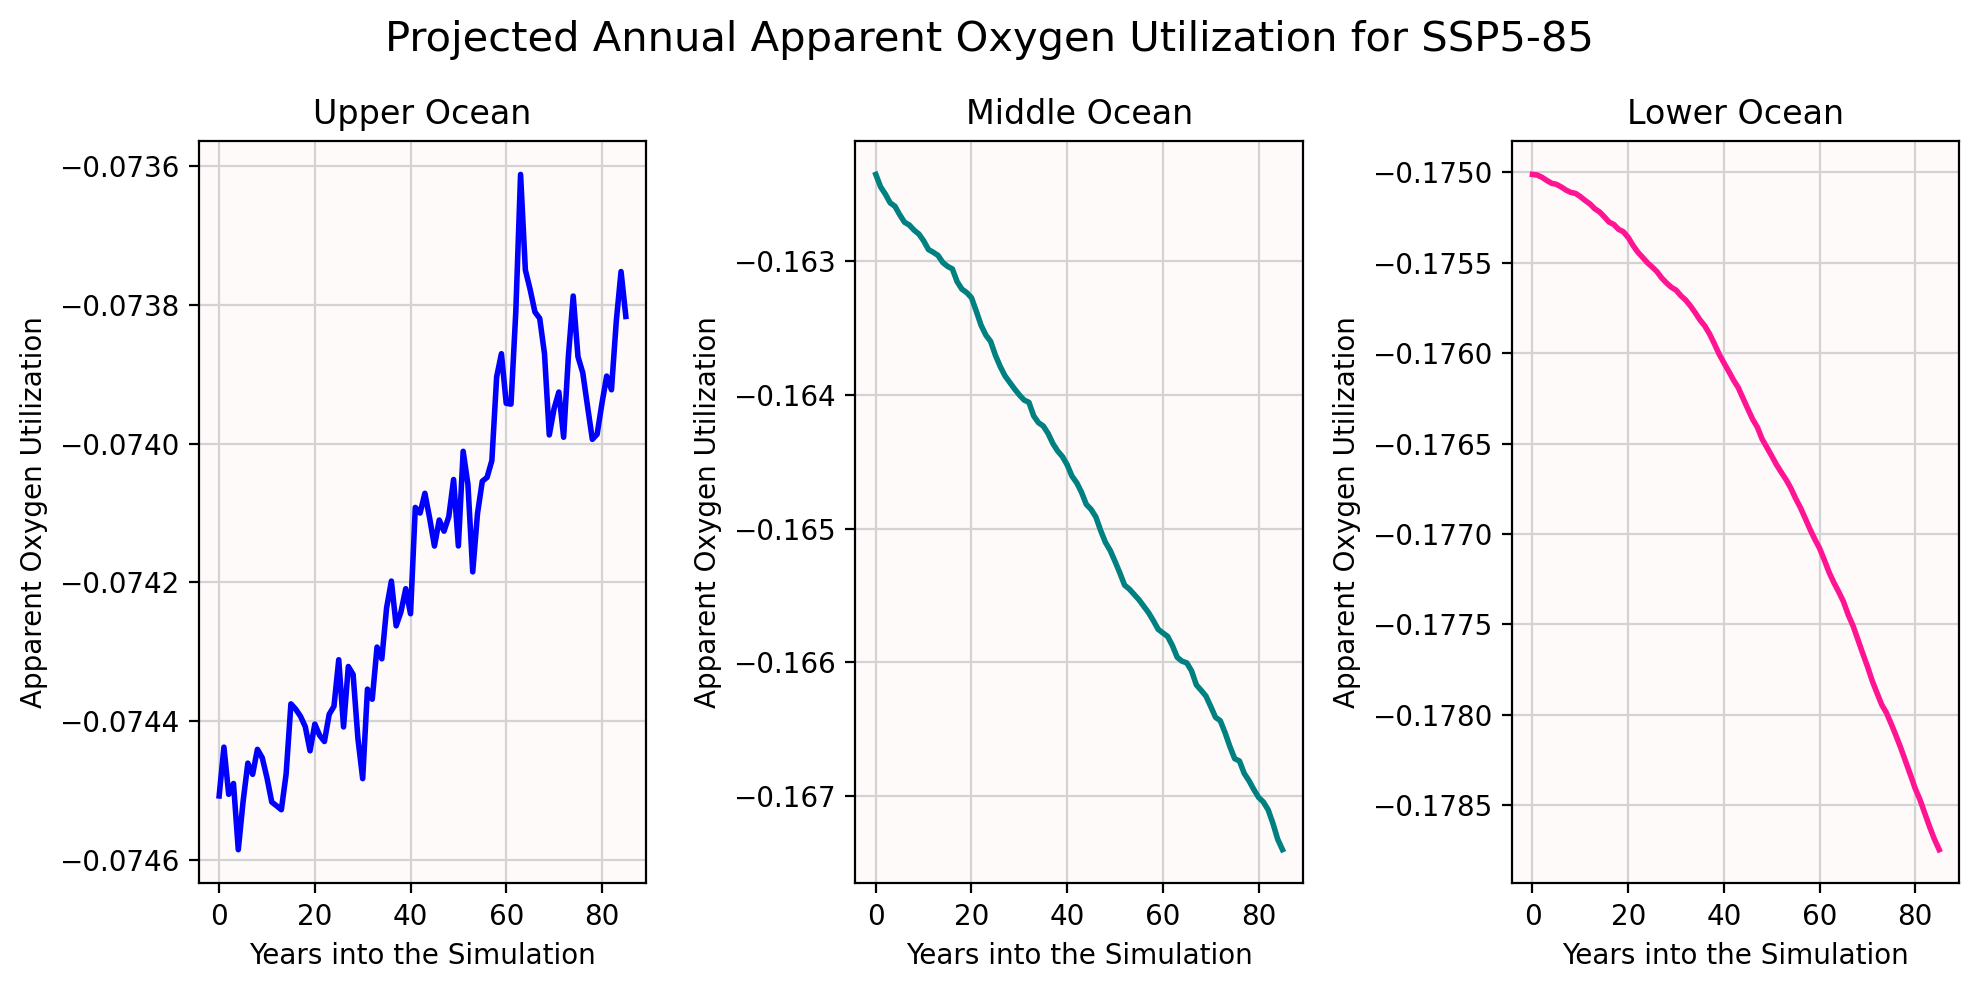

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5)) #emma's code

fig.suptitle('Projected Annual Apparent Oxygen Utilization for SSP5-85', fontsize=15)

ax1.plot(upper_ml, linewidth=2, label='Upper Ocean', color='blue')

ax2.plot(middle_ml, linewidth=2, label='Middle Ocean', color='teal')

ax3.plot(lower_ml, linewidth=2,label='Lower Ocean', color='deeppink')

ax1.set_ylabel('Apparent Oxygen Utilization')
ax1.set_xlabel('Years into the Simulation')
ax1.set_facecolor('snow')
ax1.grid(color='lightgrey')
ax1.set_title('Upper Ocean')

ax2.set_ylabel('Apparent Oxygen Utilization')
ax2.set_xlabel('Years into the Simulation')
ax2.set_facecolor('snow')
ax2.grid(color='lightgrey')
ax2.set_title('Middle Ocean')

ax3.set_ylabel('Apparent Oxygen Utilization')
ax3.set_xlabel('Years into the Simulation')
ax3.set_facecolor('snow')
ax3.grid(color='lightgrey')
ax3.set_title('Lower Ocean')

plt.tight_layout()

**Figure 9.** Projected Annual Apparent Oxygen Utilization [mol/m^3] of the Upper, Middle,and Lower Ocean for SSP5-85. a)Upper ocean is sliced from 0m-1000m, b) middle from 1000m- 3000m, and c)lower from 3000m- 6500m. Latitude and longitude are averaged, while mom level is used to acquire a yearly plot. Data originates from Google Cloud CMIP6, institution NOAA-GFDL, and model ESM4 (https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv). 

In [30]:
O2_avg = O2_SSP585.mean(dim=['latitude','longitude','lev'])
O2sat_avg=O2_sat_SSP585.mean(dim=['latitude','longitude','lev'])
AOU_avg = AOU_SSP585.mean(dim=['latitude','longitude','lev'])

In [31]:
O2_ml=ml.util.annual_average(O2_avg, tcoord='time') #emma's code
O2sat_ml=ml.util.annual_average(O2sat_avg, tcoord='time')
AOU_ml=ml.util.annual_average(AOU_avg, tcoord='time') 

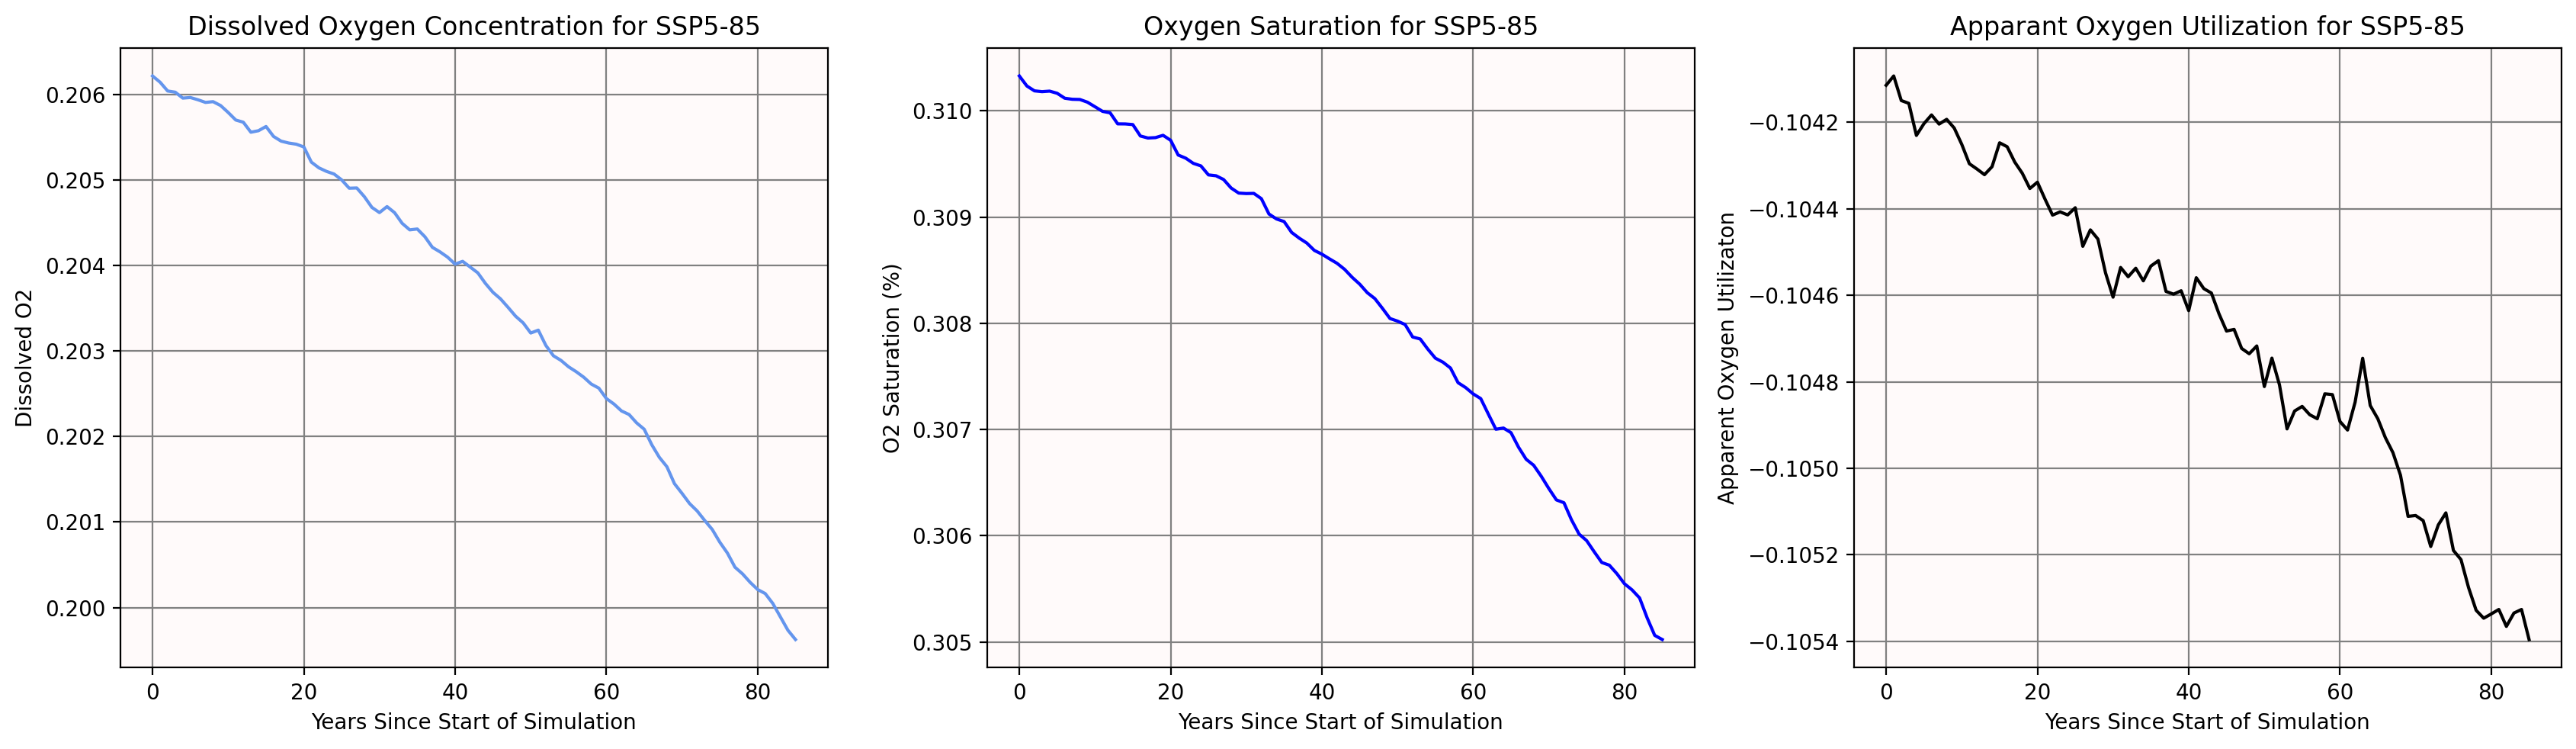

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(17,5)) #emma's code


ax1.plot(O2_ml, color = 'cornflowerblue')
ax2.plot(O2sat_ml, color='blue')
ax3.plot(AOU_ml, color = 'black')

ax1.set_title('Dissolved Oxygen Concentration for SSP5-85')
ax2.set_title('Oxygen Saturation for SSP5-85')
ax3.set_title('Apparant Oxygen Utilization for SSP5-85')

ax1.grid(color='grey')
ax2.grid(color='grey')
ax3.grid(color='grey')

ax1.set_facecolor('snow')
ax2.set_facecolor('snow')
ax3.set_facecolor('snow')

ax1.set_xlabel('Years Since Start of Simulation')
ax2.set_xlabel('Years Since Start of Simulation')
ax3.set_xlabel('Years Since Start of Simulation')

ax1.set_ylabel('Dissolved O2')
ax2.set_ylabel('O2 Saturation (%)')
ax3.set_ylabel('Apparent Oxygen Utilizaton')

plt.tight_layout()